In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [107]:
df = pd.read_csv("vehicle.csv")

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [109]:
df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [110]:
#Check NAN values
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [111]:
# we can see there is a very small percentage of data having null values, we can impute this with median
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df.iloc[:,:-1] = imp.fit_transform(df.iloc[:,:-1])

In [112]:
df.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

We see that all nan values have been removed

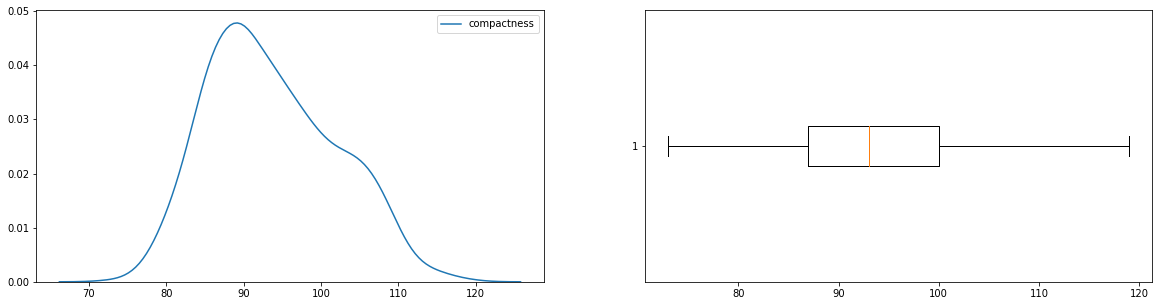

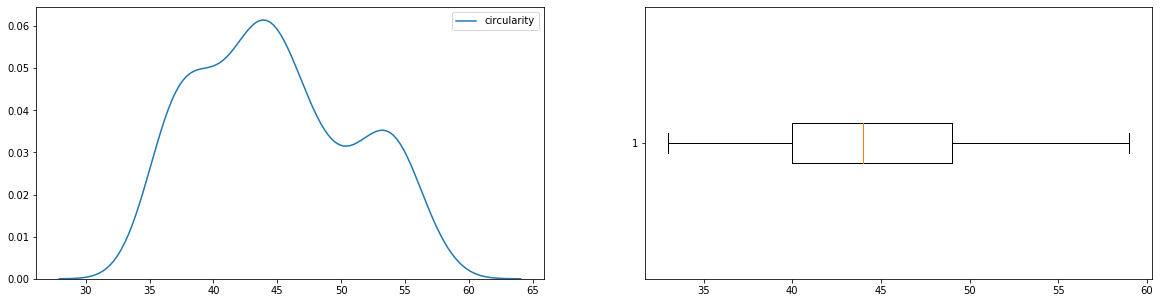

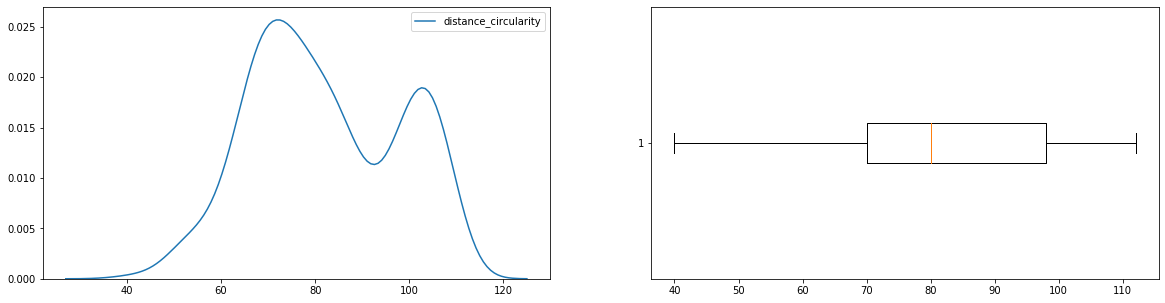

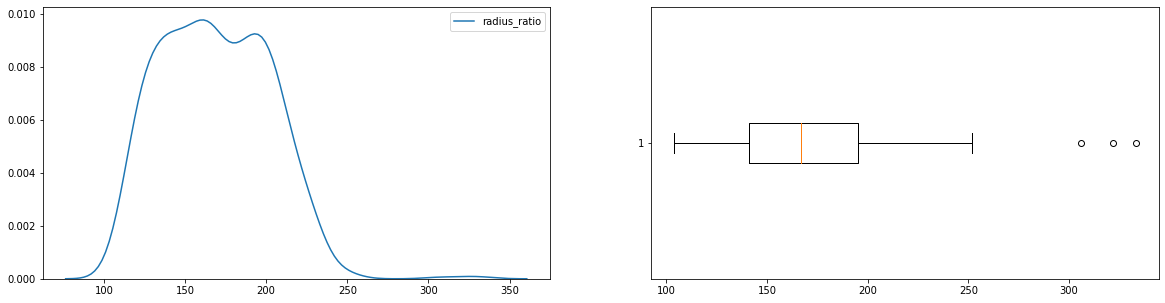

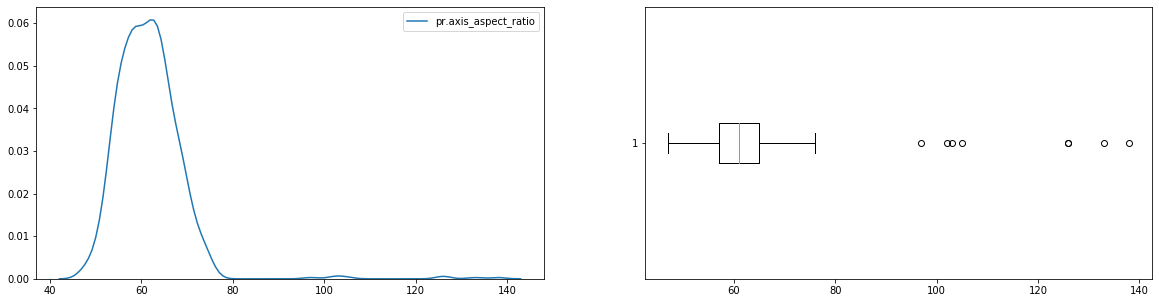

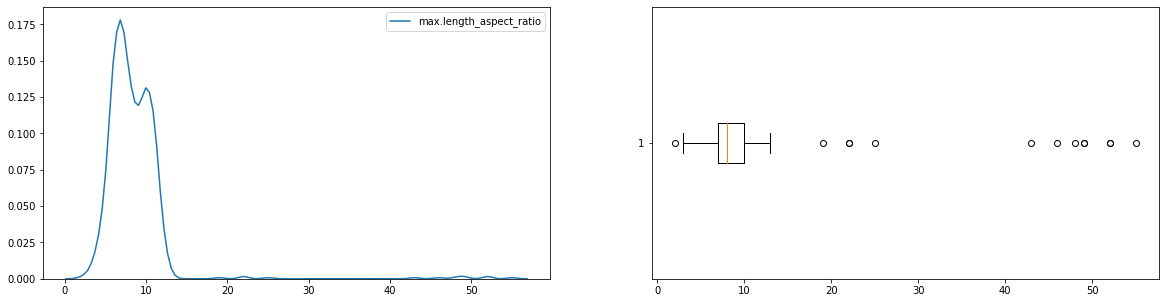

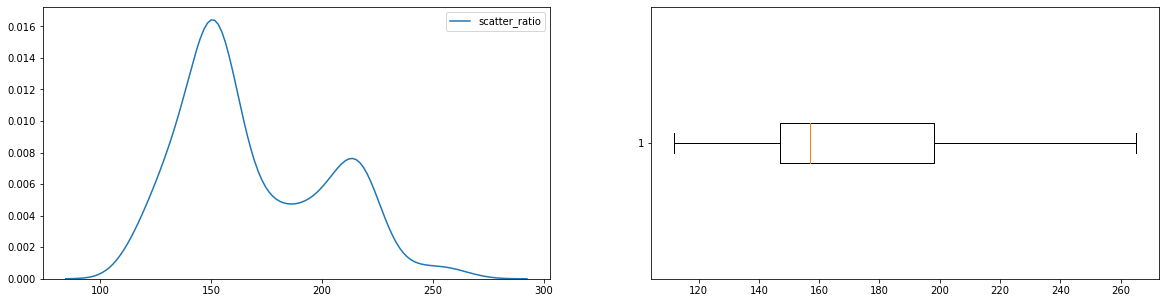

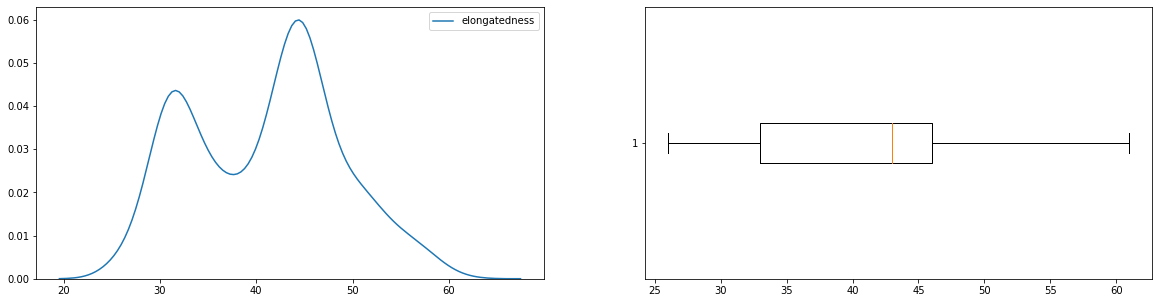

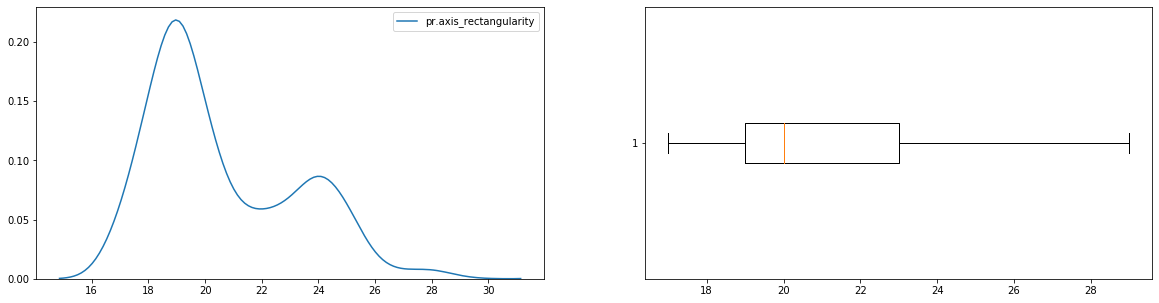

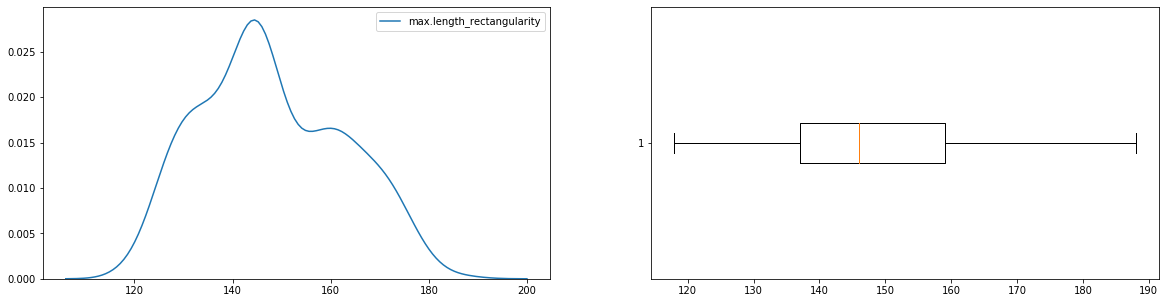

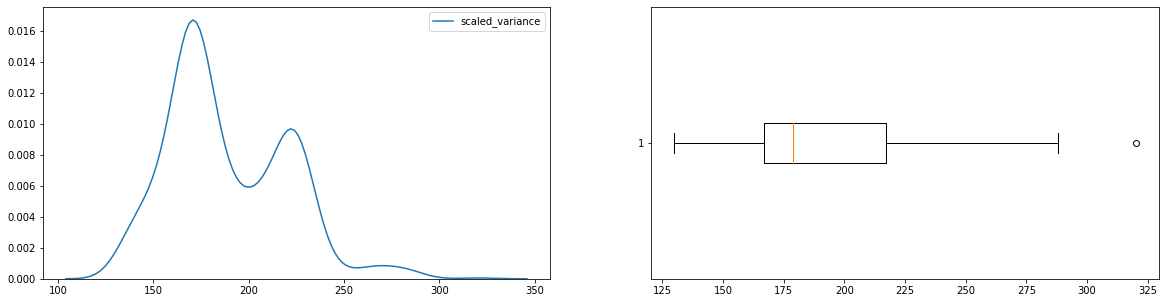

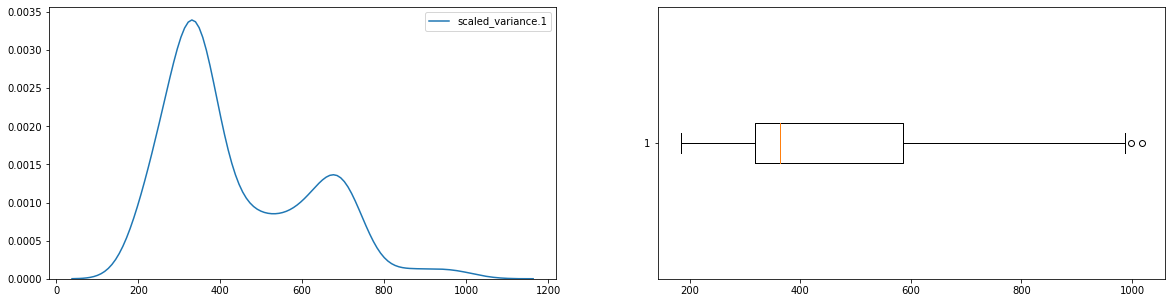

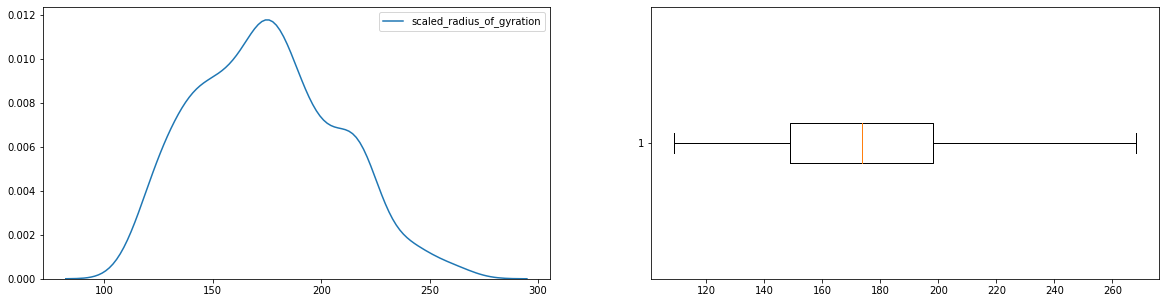

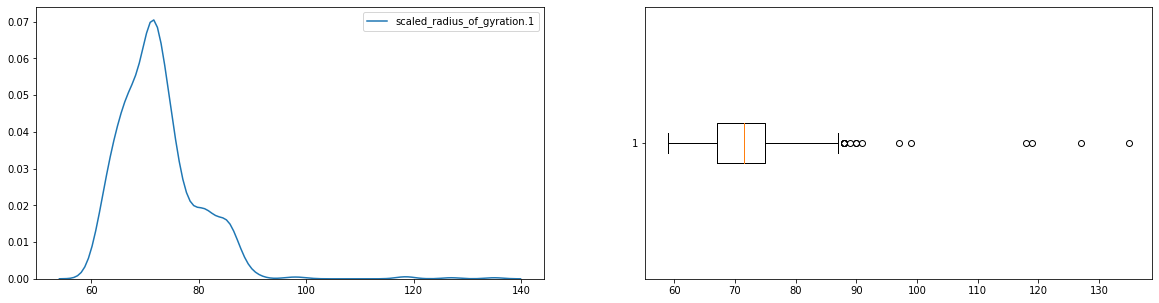

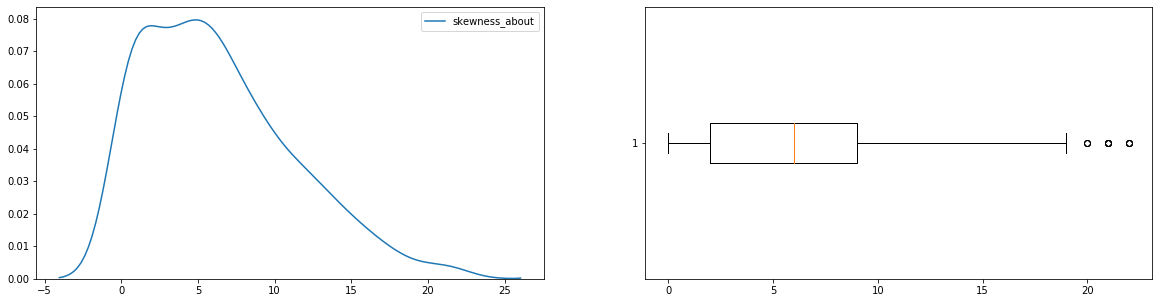

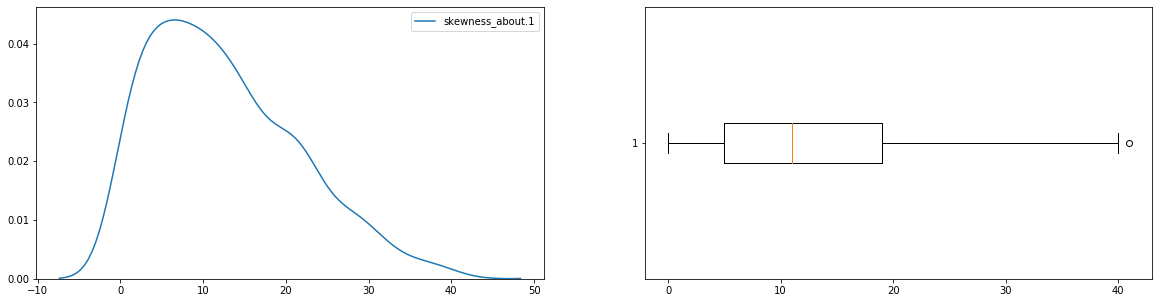

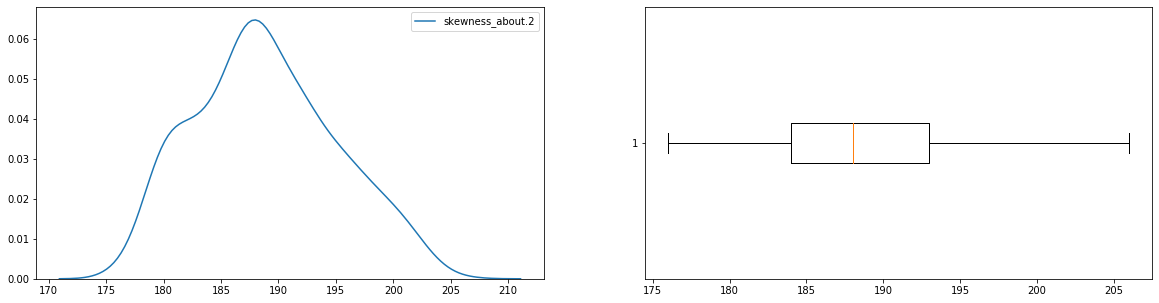

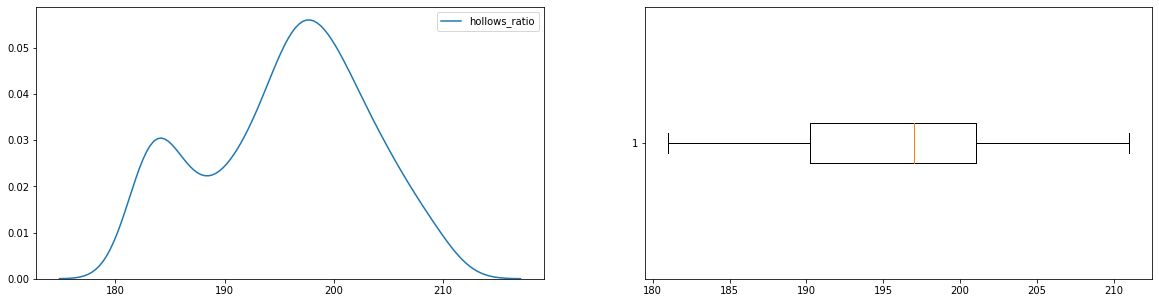

In [125]:
cols = df.columns[:-1]
for col in cols:
    fig, ax = plt.subplots(1,2, figsize=(20,5))
    sns.kdeplot(df[col],ax=ax[0])
    ax[1] = plt.boxplot(df[col],vert=False)
    plt.show()

In [145]:
# Remove outliers - Any number 4 times Std Dev on either side of mean is outlier
cols = df.columns[:-1]
std = df.std()
mean = df.mean()
ll = mean - (3*std)
ul = mean + (3*std)
for i in cols:
    df[i][df[i]<ll[i]] = ll[i]
    df[i][df[i]>ul[i]] = ul[i]
    
    

/var/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/var/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


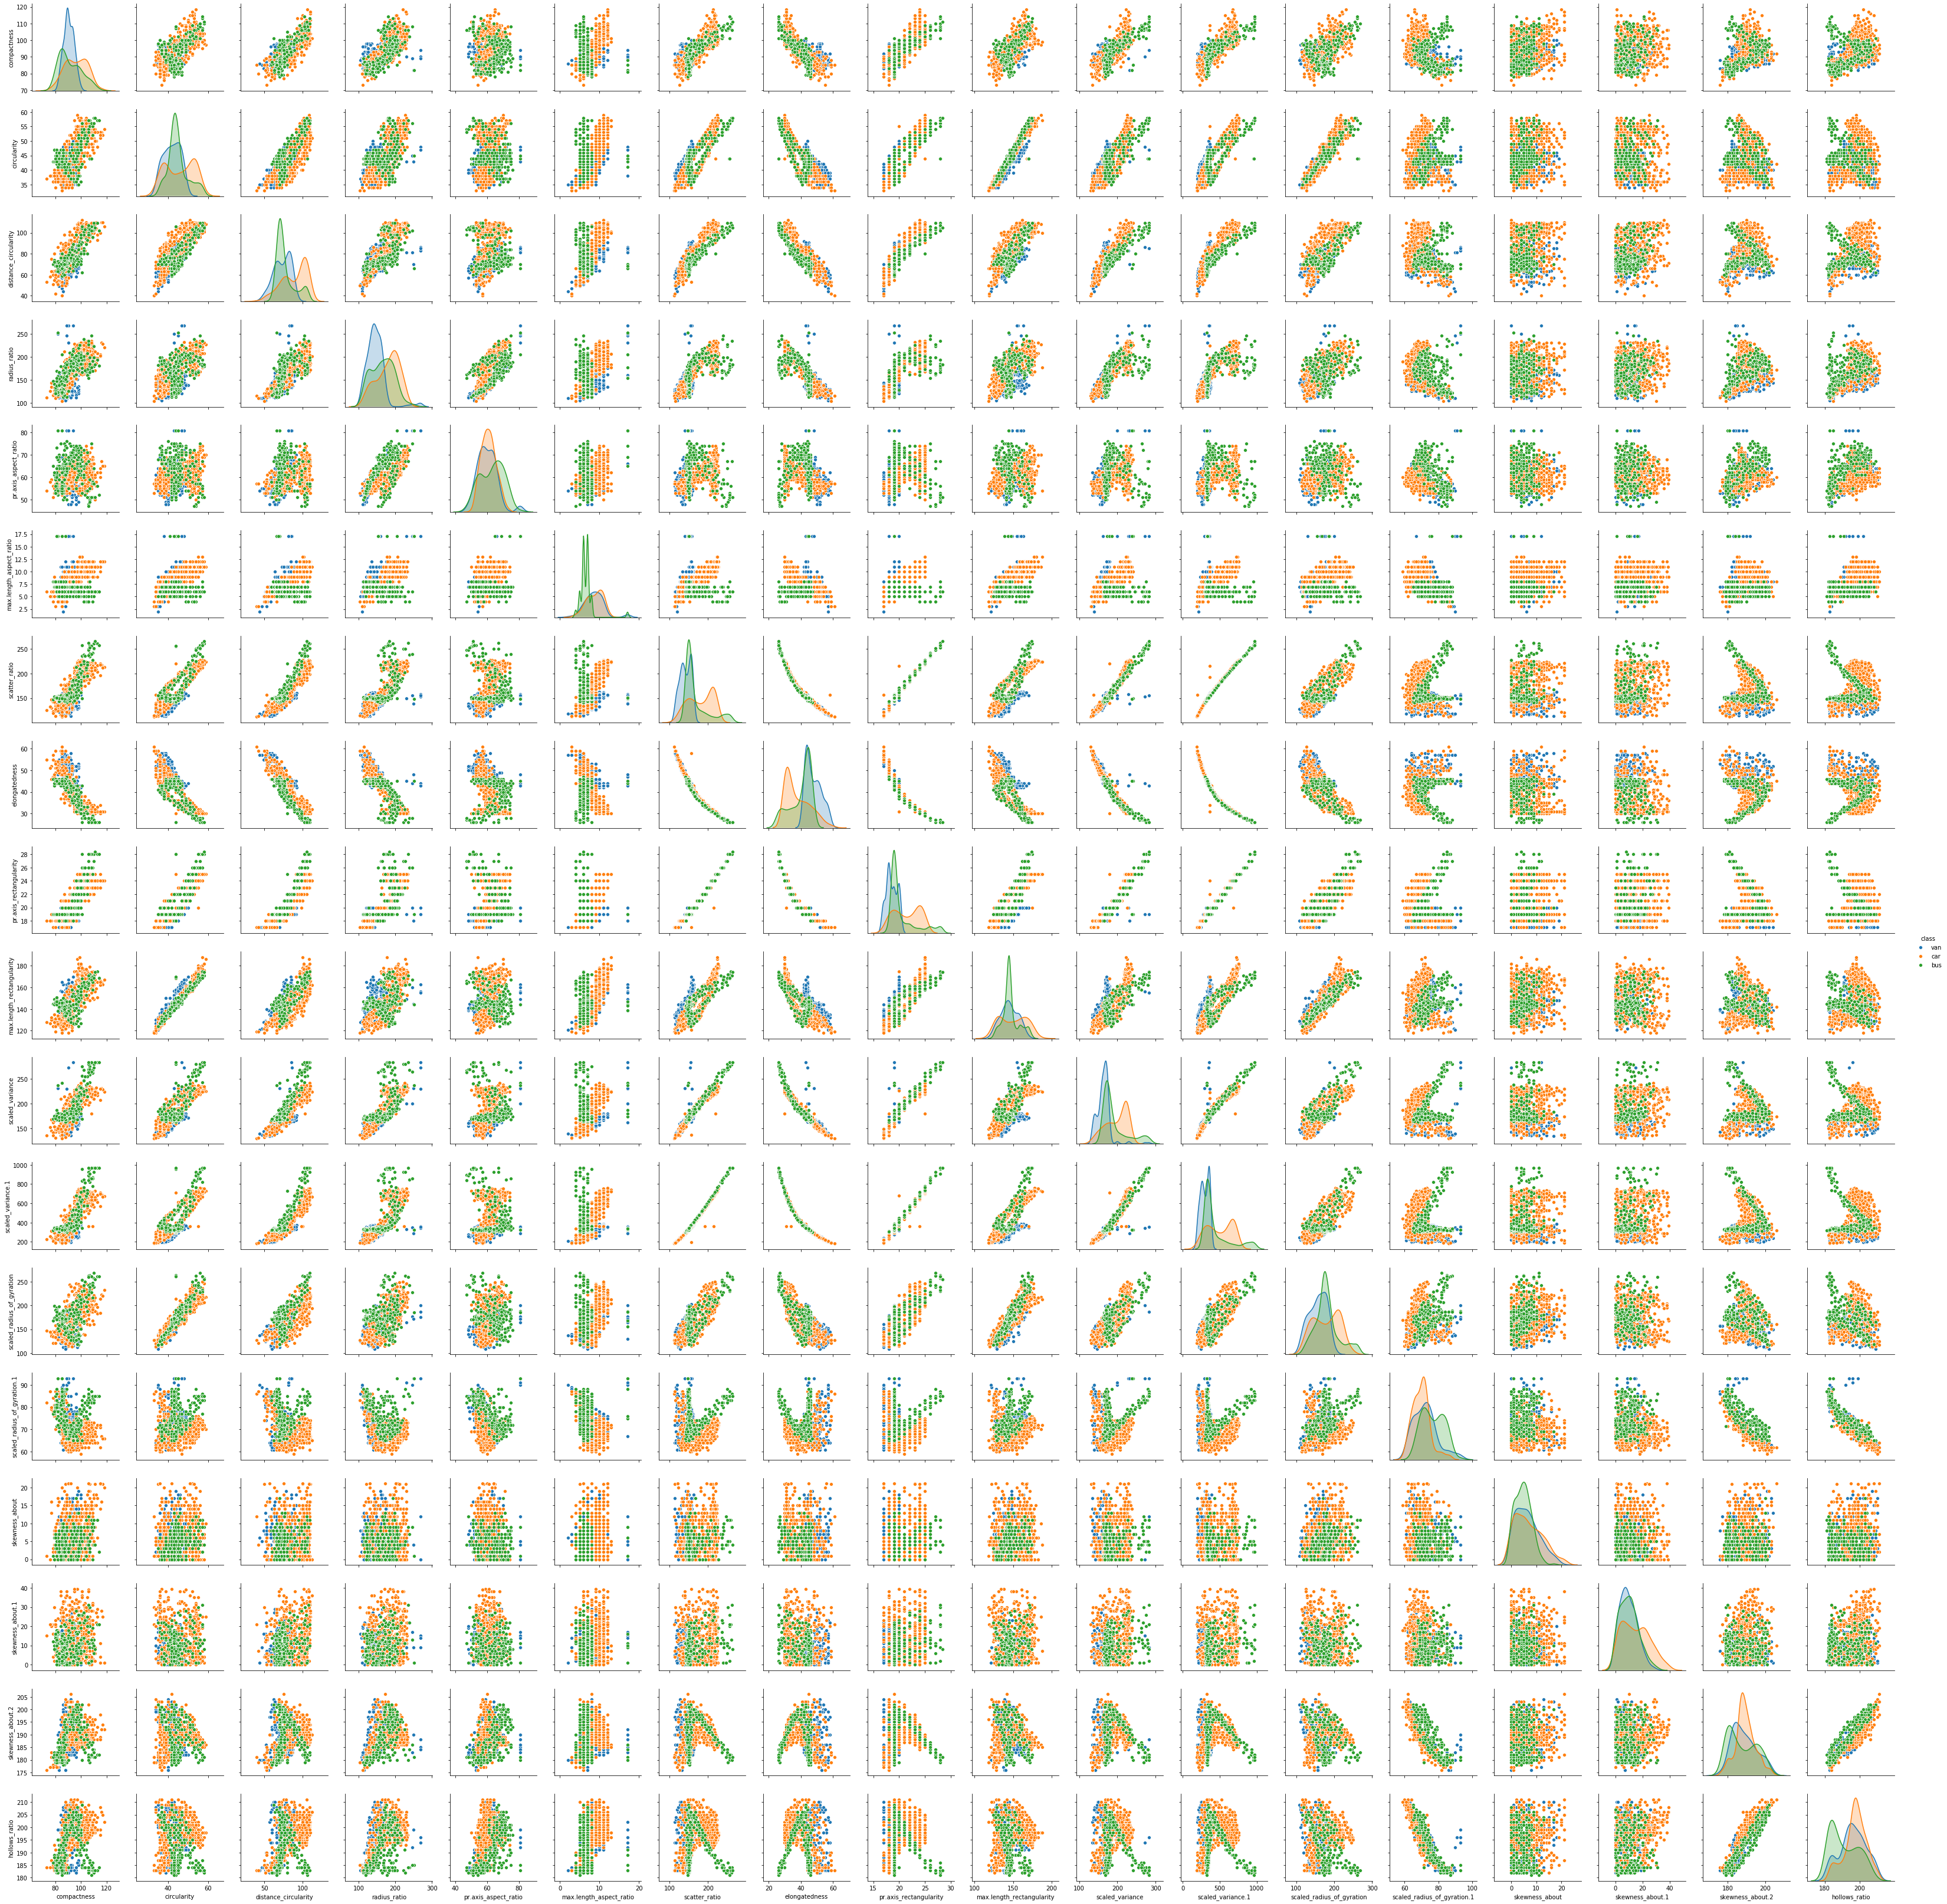

In [148]:
sns.pairplot(df,diag_kind='kde',hue='class')

In [310]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df.iloc[:,:-1])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [311]:
var_exp = pca.explained_variance_ratio_
var_exp.sort()
var_cum = np.cumsum(var_exp[::-1])
print (var_exp[::-1])
print (var_cum)

[9.61261167e-01 1.68170390e-02 1.16445681e-02 3.28432694e-03
 2.06746859e-03 1.33923516e-03 1.13759332e-03 7.29283724e-04
 6.43996574e-04 3.28796134e-04 3.03943155e-04 1.59575208e-04
 9.86620804e-05 8.66720004e-05 3.56284644e-05 3.30289999e-05
 2.61299103e-05 2.88540113e-06]
[0.96126117 0.97807821 0.98972277 0.9930071  0.99507457 0.99641381
 0.9975514  0.99828068 0.99892468 0.99925347 0.99955742 0.99971699
 0.99981566 0.99990233 0.99993796 0.99997098 0.99999711 1.        ]


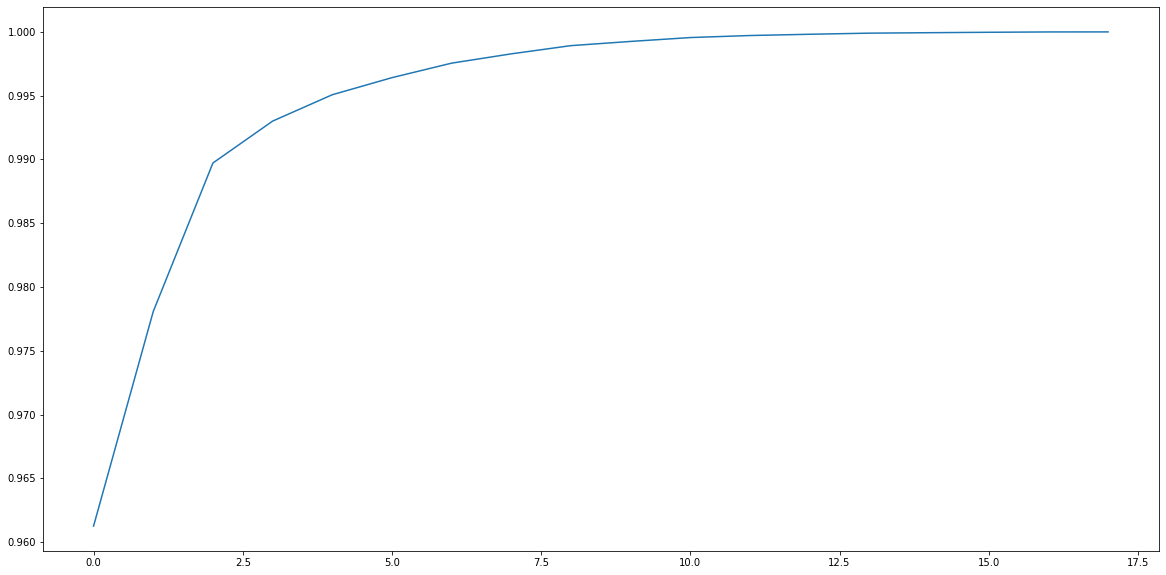

In [244]:
fig, ax = plt.subplots(1,figsize=(20,10))
plt.plot(var_cum)
plt.show()

In [203]:
pca = PCA(2).fit_transform()
pca.fit(df.iloc[:,:-1])

In [204]:
df_pca

compactness  circularity  distance_circularity  radius_ratio  \
0     0.036056     0.027830              0.075436      0.131854   
1     0.062977    -0.038024              0.117316      0.811979   
2    -0.015005     0.123039              0.058917      0.373470   
3    -0.186959    -0.096642             -0.287388      0.118436   
4    -0.041669     0.017699              0.403413     -0.108254   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.005402                 0.004779       0.177173   
1              0.170557                 0.024533       0.012286   
2              0.125821                 0.032809       0.010650   
3              0.081891                -0.049469      -0.029937   
4             -0.119830                 0.077677       0.152733   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.040210                0.013720                   0.062576   
1      -0.040925               -0.002254                  -0.098490   
2      -0.024338               -0.000963                   0.263209   
3       0.011830               -0.005541                  -0.339172   
4      -0.035807                0.011098                   0.111715   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.159838           0.944595                   0.140587   
1         0.119081          -0.087553                  -0.383198   
2         0.134502          -0.223027                   0.810647   
3         0.574390          -0.041690                  -0.056672   
4         0.284625          -0.120461                   0.071025   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.000259        0.002085          0.009438   
1                    -0.161966       -0.011032          0.072712   
2                     0.041076        0.035185         -0.160766   
3                     0.410237       -0.130033          0.014038   
4                    -0.003981       -0.007265          0.808526   

   skewness_about.2  hollows_ratio  
0          0.000392       0.004449  
1          0.178957       0.218948  
2         -0.029348      -0.013389  
3         -0.240722      -0.394473  
4         -0.096017       0.048106

In [205]:
print (pca.singular_values_)

[5416.6608936   716.4497158   596.17346455  316.61693464  251.20623197]


In [276]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [312]:
X = df.copy()
y = X.pop('class')

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =1)

In [314]:
X_train_std = preprocessing.StandardScaler().fit_transform(X_train)
X_test_std = preprocessing.StandardScaler().fit_transform(X_test)

In [315]:
# pca = PCA(5)
# X_train_std = pca.fit_transform(X_train_std)
# X_test_std = pca.fit_transform(X_test_std)

In [316]:
model = SVC()
model.fit(X_train_std, y_train)
result = model.score(X_test_std, y_test)
print(result)

0.9448818897637795


In [317]:
param = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.05,1]}

In [318]:
clf = GridSearchCV(model, param, cv=5, n_jobs=-1)
clf.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 1], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [319]:
cv_df = pd.DataFrame(clf.cv_results_)
cv_df.loc[:,['rank_test_score','mean_test_score','params']].sort_values(by='rank_test_score')

rank_test_score  mean_test_score                           params
5                1         0.957770        {'C': 1, 'kernel': 'rbf'}
4                2         0.944257     {'C': 1, 'kernel': 'linear'}
2                3         0.908784  {'C': 0.05, 'kernel': 'linear'}
0                4         0.875000  {'C': 0.01, 'kernel': 'linear'}
3                5         0.613176     {'C': 0.05, 'kernel': 'rbf'}
1                6         0.500000     {'C': 0.01, 'kernel': 'rbf'}

In [320]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [321]:
clf.score(X_test_std,y_test)

0.9448818897637795